In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: "%.2f" % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


#from scipy.stats import lognorm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv("/content/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.10,39343.00
1,1.30,46205.00
2,1.50,37731.00
3,2.00,43525.00
4,2.20,39891.00


In [4]:
df.shape

(30, 2)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.00,5.31,2.84,1.10,3.20,4.70,7.70,10.50
Salary,30.00,76003.00,27414.43,37731.00,56720.75,65237.00,100544.75,122391.00


In [6]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

#MODEL
model = LinearRegression().fit(X,y)
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

Intercept: 25792.200198668696
Coefficient: 9449.962321455076


In [7]:
#YearsExperience = 4, Salary = ? 
model.intercept_[0] + model.coef_[0][0] * 4

63592.049484489

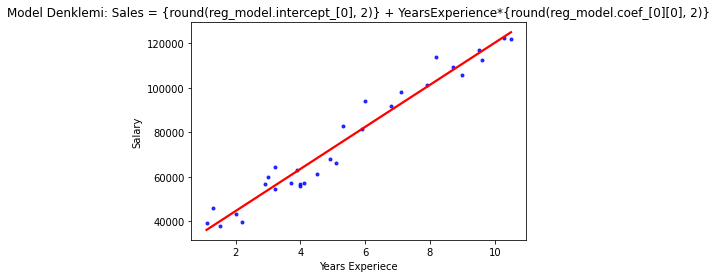

In [10]:
#MODEL VISUALIZATION

fig = sns.regplot(x = X, y = y, scatter_kws ={"color":"b","s":9}, ci = False, color = "r")

fig.set_title("Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + YearsExperience*{round(reg_model.coef_[0][0], 2)}")
fig.set_ylabel("Salary")
fig.set_xlabel("Years Experiece")
plt.show()

In [11]:
#Prediction Success
y_hat = model.predict(X)
y_hat


array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = np.sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)

print("MSE: ",MSE, '\n',
     "RMSE:",RMSE, '\n',
     "MAE: ",MAE)

print("y_mean: ", y.mean())
print("y_std: ", y.std())

MSE:  31270951.722280964 
 RMSE: 5592.043608760661 
 MAE:  4644.2012894435375
y_mean:  Salary   76003.00
dtype: float64
y_std:  Salary   27414.43
dtype: float64


In [13]:
#R-Square 

model.score(X,y)

0.9569566641435086